In [ ]:
#importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

loading the mnist data from keras_dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
#shape of the numpy array
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data=60000 images
test data=10,000 images

image dimension--.28x28
grayscale image-->1 channel

In [ ]:
#printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


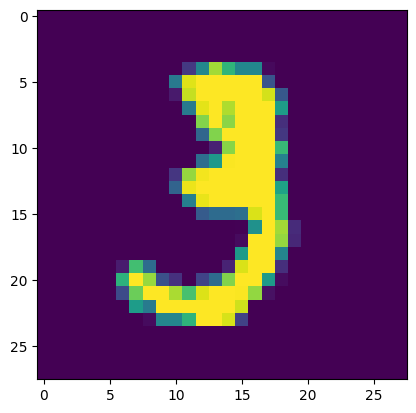

3


In [ ]:
#displaying the image
plt.imshow(x_train[10])
plt.show()

#print the corresponding the label
print(y_train[10])


image labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can apply onehot encoding

all th eimages have the same dimension in the datasei .if not we have to resize all the images to a common dimension

In [ ]:
#scaling the values
x_train=x_train/255
x_test=x_test/255



In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

buliding the neural network

In [ ]:
#setting up the layers of the neural network
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the neural network
model.compile(optimizer='adam',
               loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

In [ ]:
# training the neural network
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8522 - loss: 0.5147
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9552 - loss: 0.1530
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9669 - loss: 0.1089
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9743 - loss: 0.0854
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0697
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9818 - loss: 0.0588
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9848 - loss: 0.0500
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9878 - loss: 0.0434
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0376
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9899 - loss: 0.0335


training data acccuracy=98.9%

**accuracy on test data**

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9633 - loss: 0.1453
0.9674999713897705


test data accuracy=96.7%

In [ ]:
print(x_test.shape)

(10000, 28, 28)


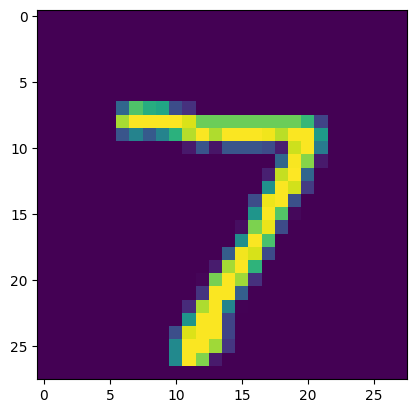

In [ ]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred=model.predict(x_test)
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


In [ ]:
#probability of digit images
print(y_pred[0])

[1.2271734e-03 1.3152117e-04 1.4353881e-05 9.5399076e-01 5.9212923e-08
 2.8552724e-02 4.8920330e-12 9.9999207e-01 1.5508609e-03 5.8510602e-01]


madel.predict gives the prediction probability of each class for that data point

In [ ]:
#converting the prediction probability to class label
label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
#converting the prediction probability to class label for all test data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(y_pred)

[[1.22717337e-03 1.31521170e-04 1.43538809e-05 ... 9.99992073e-01
  1.55086094e-03 5.85106015e-01]
 [1.02159311e-03 1.55860465e-02 9.99997139e-01 ... 5.55079573e-08
  2.63353884e-02 1.56362000e-06]
 [2.33606006e-05 9.99690056e-01 2.29652897e-01 ... 3.55096102e-01
  1.54823750e-01 1.27842259e-02]
 ...
 [7.93516293e-08 2.32829893e-06 3.73574416e-08 ... 5.77335298e-01
  2.51826772e-04 9.49805856e-01]
 [4.81253432e-04 1.37992856e-05 2.20838868e-11 ... 1.93954334e-02
  5.06657124e-01 1.88701665e-06]
 [7.06656557e-03 1.40106593e-10 3.29858494e-07 ... 2.66401057e-09
  2.63225029e-05 9.45672607e-09]]


y_test--> true labels

y_pred_labels--> predictive labels


confusion matrix

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 959    0    1    0    3    2    3    4    2    6]
 [   0 1112    0   11    0    1    2    1    8    0]
 [   7    0  974   14    4    0    4   15   13    1]
 [   0    0    3  994    0    3    1    5    4    0]
 [   0    0    3    0  953    0    7    6    2   11]
 [   2    0    0   15    1  868    3    1    1    1]
 [   3    2    1    2    8    8  934    0    0    0]
 [   1    0    6    2    1    1    0 1008    3    6]
 [   5    0    2   12    4    9    2    2  934    4]
 [   3    3    0    8   35    9    1    6    5  939]], shape=(10, 10), dtype=int32)


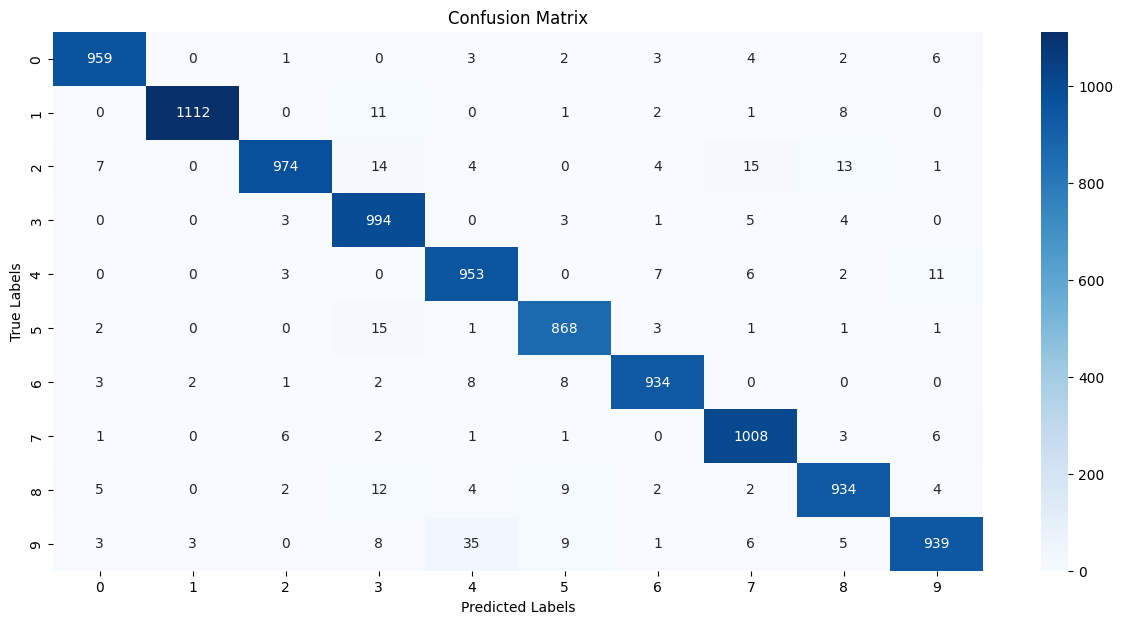

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

buliding the predictive system

In [ ]:
input_image_path='/content/mnist_test_0-7.png'

In [ ]:
input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


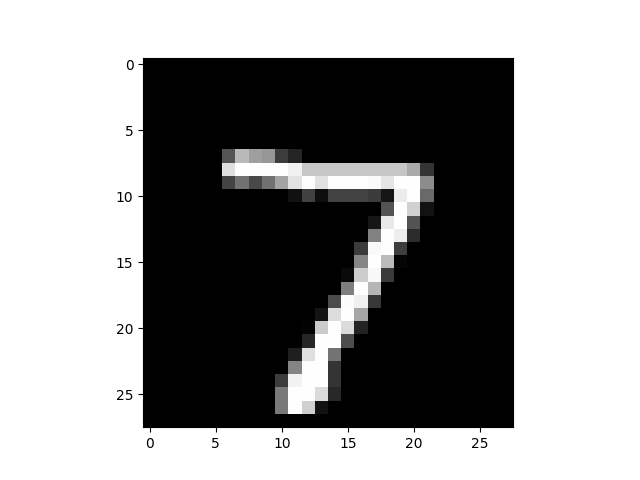

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(480, 640, 3)

In [ ]:
grayscale_image=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

In [ ]:
grayscale_image.shape

(480, 640)

In [ ]:
input_image_resize=cv2.resize(grayscale_image,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[3.3626151e-08 4.4360000e-16 9.6207297e-01 2.8857743e-08 0.0000000e+00
  5.4666941e-07 4.9680113e-15 1.0000000e+00 1.3541431e-12 1.8396151e-11]]


In [ ]:
input_pred_label=np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

7


path of the input image/content/mnist_test_0-7.png


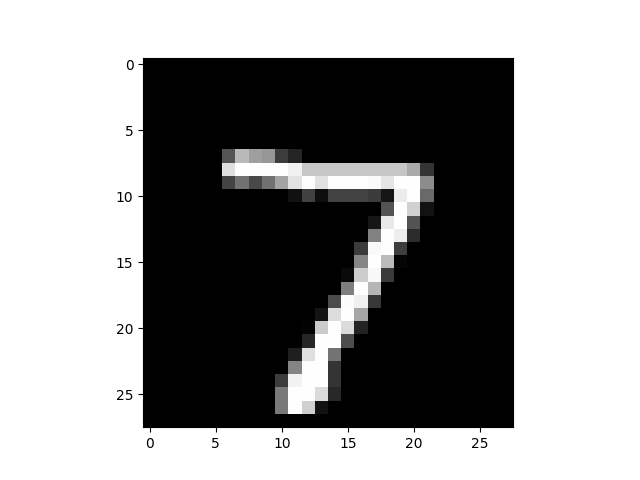

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
the image recognized as 7


In [ ]:
input_large_path=input('path of the input image')
input_image=cv2.imread(input_large_path)
cv2_imshow(input_image)
grayscale_image=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
input_image_resize=cv2.resize(grayscale_image,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('the image recognized as',input_pred_label)

In [ ]:
streamlit run app.pyib

SyntaxError: invalid syntax (<ipython-input-115-1e639fe69cce>, line 1)